In [1]:
import obspy
import seisbench.models as sbm
import matplotlib.pyplot as plt
import numpy as np

import ipynb.fs 
from .defs.EDA_and_Preprocessing import Data_Sorter
from .defs.Load_and_Store_Models import load_models_pickle
from .defs.Modeling import stream_creator, peak_index_getter

In [2]:
'''
 Takes in the original stream, the annotated stream and the indices dictionary that is returned when 
 calling Annotation_Index_Selector. Plots 3 subplots: the top plot is the original stream, the second
 plot is the annotated stream and the final plot are the locations where the annotation predicts 
 the picks to be. 
'''

def wave_plotter(stream, annotations, idx_dict, threshold):
    fig = plt.figure(figsize=(16, 10))
    axs = fig.subplots(3, 1, sharex=True, gridspec_kw={'hspace': 0})
    
    model_type = annotations[0].stats.channel.split('_')[0]            
    offset = annotations[0].stats.starttime - stream[0].stats.starttime
    for i in range(3):
        channel = annotations[i].stats.channel[-1]
        axs[0].plot(stream[i].times(), stream[i].data, label=stream[i].stats.channel)
        if channel != "N":  # Do not plot noise curve
            axs[1].plot(annotations[i].times() + offset, annotations[i].data, label=annotations[i].stats.channel)
        
        if channel == 'P':
            p_channel_idx = idx_dict['P_channel_ind']
            axs[2].plot(annotations[i].times()[p_channel_idx], annotations[i].data[p_channel_idx],  '+', markersize=7, mfc=None, mec='blue', mew=2,
                    label=f"{np.size(p_channel_idx)} {channel}_channel peaks")
            
        elif channel == 'S':
            s_channel_idx = idx_dict['S_channel_ind']

            axs[2].plot(annotations[i].times()[s_channel_idx], annotations[i].data[s_channel_idx],  '+', markersize=7, mfc=None, mec='orange', mew=2,
                    label=f"{np.size(s_channel_idx)} {channel}_channel peaks")
            
    

    axs[0].set_title(f"Original Stream, {model_type} Predicted Streams, {model_type} Predicted Streams > {threshold}", fontsize=16, weight='bold')
    axs[0].set_ylabel(f"Wave Magnitude", fontsize=12, weight='bold')
    axs[1].set_ylabel(f"Probability", fontsize=12, weight='bold')
    axs[2].set_ylabel(f"Probability", fontsize=12, weight='bold')
    axs[2].set_xlabel(f"Time (s)", fontsize=16, weight='bold')

    axs[0].legend()
    axs[1].legend()
    axs[2].legend()
    plt.show()
    return 0

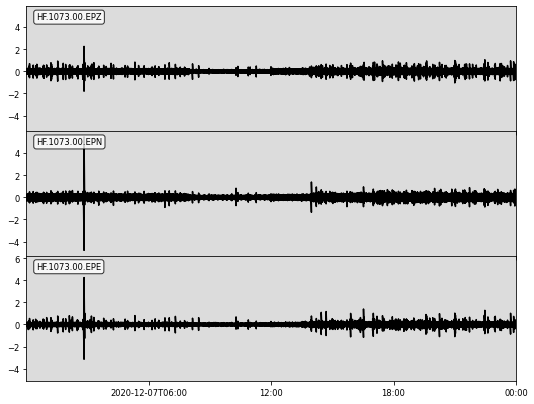

In [3]:
# Picks out the station data that we will use.
path = '/global/scratch/users/taira/mleq/mseed/'
collected_data = !ls /global/scratch/users/taira/mleq/mseed/

sorted_dict = Data_Sorter(collected_data)
stream = stream_creator(path, sorted_dict, '1073', True)

In [4]:
''' Loads the evaluated model. '''
gpd_original_predictions = load_models_pickle('Station_1073_Annotations/gpd_model_original')
gpd_original_predictions['annotation']

3 Trace(s) in Stream:
HF.1073.00.GPD_P | 2020-12-07T00:00:26.792000Z - 2020-12-08T00:00:22.792000Z | 10.0 Hz, 863961 samples
HF.1073.00.GPD_S | 2020-12-07T00:00:26.792000Z - 2020-12-08T00:00:22.792000Z | 10.0 Hz, 863961 samples
HF.1073.00.GPD_N | 2020-12-07T00:00:26.792000Z - 2020-12-08T00:00:22.792000Z | 10.0 Hz, 863961 samples

In [5]:
''' Get the indices of the traces whose probabilites are above the given threshold. '''
peak_ind_dict = peak_index_getter(gpd_original_predictions['annotation'], threshold=.99)
peak_ind_dict.keys()

dict_keys(['P_channel_ind', 'S_channel_ind'])

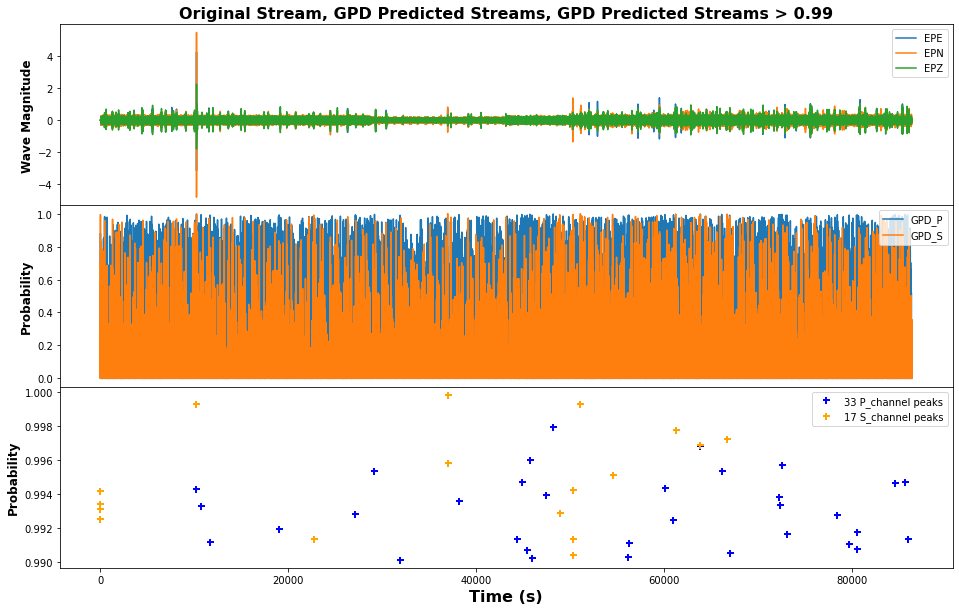

0

In [6]:
''' Calls the plotter function. '''
wave_plotter(stream, gpd_original_predictions['annotation'], peak_ind_dict, threshold=.99)